# Data Exploration & Preprocessing 

In [50]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt

# Import machine learning models and metrics from Scikit-Learn and XGBoost
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

In [51]:
df = pd.read_csv('../data/telecom_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [52]:
df=df.drop(['customerID'],axis="columns")          # Drop 'customerID' as it does not contribute to the prediction 

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [54]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [55]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')   # Convert 'TotalCharges' to numeric, coercing errors to NaN

df['TotalCharges'].isnull().sum()

np.int64(11)

In [56]:
df.dropna(inplace=True)               # Remove rows with missing values (NaNs) to ensure data integrity

df['TotalCharges'].isnull().sum()

np.int64(0)

In [57]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)   # Encode the target variable 'Churn': 1 for 'Yes', 0 for 'No'

df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [58]:
# Apply One-Hot Encoding to categorical features and dropping the first category to avoid multicollinearity
df = pd.get_dummies(df, drop_first=True)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7032 non-null   int64  
 5   gender_Male                            7032 non-null   bool   
 6   Partner_Yes                            7032 non-null   bool   
 7   Dependents_Yes                         7032 non-null   bool   
 8   PhoneService_Yes                       7032 non-null   bool   
 9   MultipleLines_No phone service         7032 non-null   bool   
 10  MultipleLines_Yes                      7032 non-null   bool   
 11  InternetS

In [60]:
# Separate features (X) and target variable (y)

X = df.drop('Churn', axis=1) 
y = df['Churn']

In [61]:
from sklearn.model_selection import train_test_split
# Split the data into training (80%) and testing (20%) sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
from sklearn.preprocessing import StandardScaler
# Standardize features by removing the mean and scaling to unit variance

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Data Training & Model Selection

In [63]:
# Define a dictionary of models and their hyperparameters for tuning

model_params = {'svm': {'model': svm.SVC(gamma='auto'),
                        
                        'params' : {'C': [1,10,20],'kernel': ['rbf','linear'] } },
                
                
                'random_forest': {'model': RandomForestClassifier(),
                                 
                                'params' : {'n_estimators': [50,100,200] } },
                
                
                'xgboost': {'model': XGBClassifier( eval_metric='mlogloss'),
                            
                            'params': {'n_estimators': [100, 200,500],
                          
                            'learning_rate': [0.01, 0.1, 0.2,0.05],
                           
                            'max_depth': [3, 5, 7]} },

                
                'logistic_regression' : {'model': LogisticRegression(solver='liblinear'),
                                         
                                         'params': {'C': [3,5,7,10,13,17],
                                                    'penalty': ['l1', 'l2']} } }


In [64]:
# Perform Hyperparameter Tuning using GridSearchCV to find the best model

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_scaled,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
scores

[{'model': 'svm',
  'best_score': np.float64(0.8016),
  'best_params': {'C': 1, 'kernel': 'rbf'}},
 {'model': 'random_forest',
  'best_score': np.float64(0.7975111111111112),
  'best_params': {'n_estimators': 200}},
 {'model': 'xgboost',
  'best_score': np.float64(0.8076444444444444),
  'best_params': {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}},
 {'model': 'logistic_regression',
  'best_score': np.float64(0.8074666666666668),
  'best_params': {'C': 17, 'penalty': 'l2'}}]

In [65]:
bestModel = pd.DataFrame(scores,columns=['model','best_score','best_params'])
bestModel

,model,best_score,best_params
0,svm,0.801600,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.797511,{'n_estimators': 200}
2,xgboost,0.807644,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est..."
3,logistic_regression,0.807467,"{'C': 17, 'penalty': 'l2'}"


# SMOTE & Final Training

In [80]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

final_model = XGBClassifier(n_estimators=200,       
                            learning_rate=0.05,    
                            max_depth=3,            
                             eval_metric='logloss')

final_model.fit(X_train_scaled, y_train)

y_pred = final_model.predict(X_test_scaled)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.66      0.49      0.57       374

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



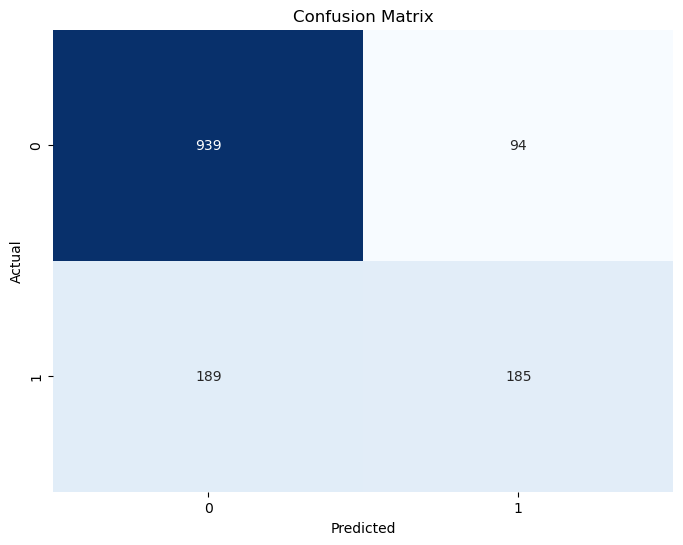

In [81]:
# Visualize the Confusion Matrix 

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### This confusion matrix shows a conservative model behavior.
#### The model achieves a lower number of false positives, resulting in higher precision for churned customers.
#### However, the recall for the churn class is relatively low, meaning a significant number of churned customers are not detected

In [82]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes

smote = SMOTE(random_state=42)


X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts()) 

final_model.fit(X_train_smote, y_train_smote)

y_pred = final_model.predict(X_test_scaled)

print("\nClassification Report after SMOTE:\n")
print(classification_report(y_test, y_pred))

Before SMOTE: Churn
0    4130
1    1495
Name: count, dtype: int64
After SMOTE: Churn
1    4130
0    4130
Name: count, dtype: int64

Classification Report after SMOTE:

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1033
           1       0.55      0.69      0.61       374

    accuracy                           0.77      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.77      0.77      1407



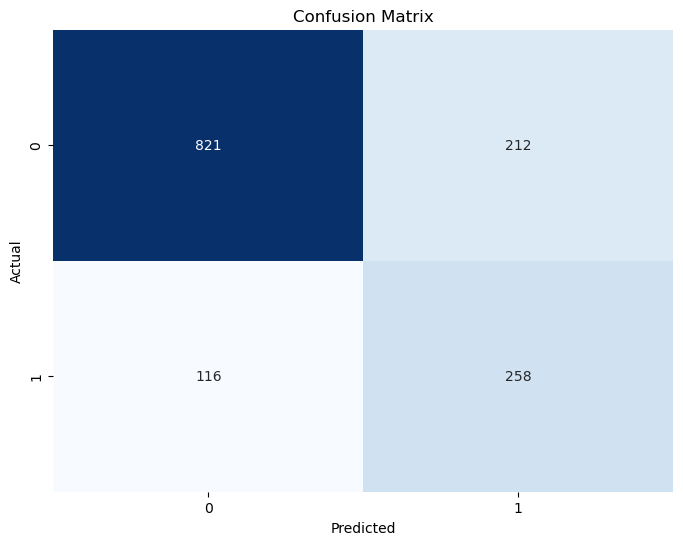

In [83]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### This confusion matrix reflects a recall-oriented model.
#### The model successfully identifies a larger portion of churned customers, significantly reducing false negatives.
#### This improvement comes at the cost of increased false positives, which is an acceptable trade-off in churn prediction problems

### For customer churn prediction, recall is prioritized over precision to minimize the number of missed churned customers.
#### Therefore, the second model configuration is more suitable for real-world deploymen

# Evaluation & Saving

AUC Score: 0.83


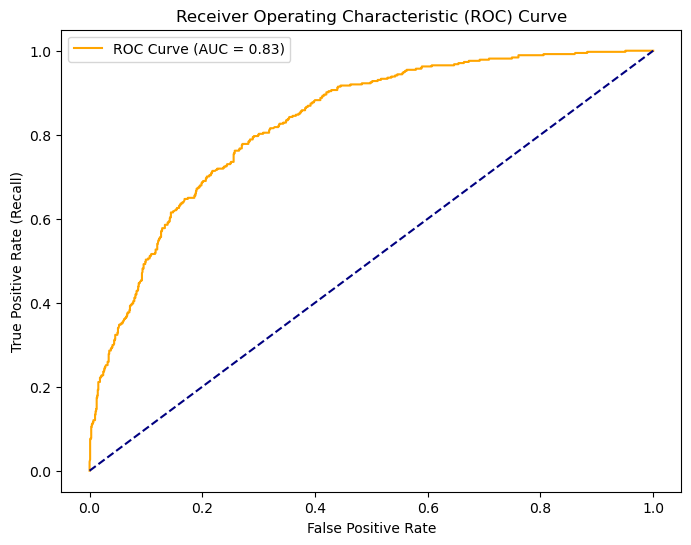

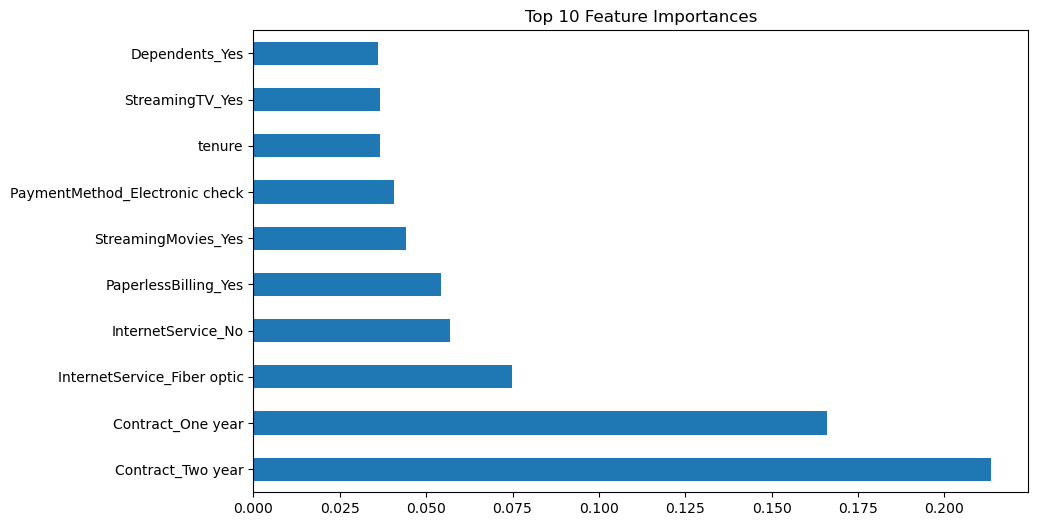

In [90]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probability of the positive class (Churn = 1)
y_pred_proba = final_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve values across different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"AUC Score: {auc_score:.2f}") 


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
feat_importances = pd.Series(final_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

In [91]:
import joblib

joblib.dump(final_model, 'churn_prediction_model.pkl')

['churn_prediction_model.pkl']